<a href="https://colab.research.google.com/github/tracy2811/DataScience-Projects/blob/master/WeightHeight/WeightHeight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Height Weight Dataset

## EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My\ Drive/Colab\ Notebooks/WeightHeight/

/content/drive/My Drive/Colab Notebooks/WeightHeight


In [3]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdf6d285f8>,
      dtype=object)

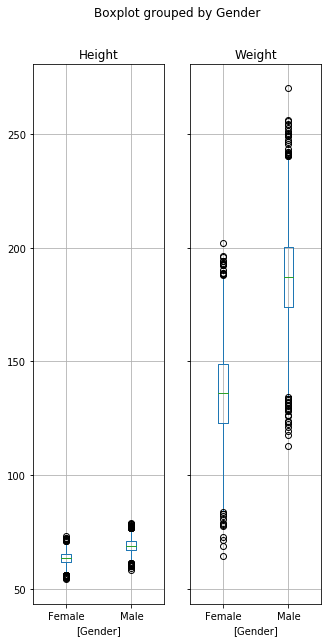

In [7]:
df.boxplot(by='Gender',figsize=(5,10))

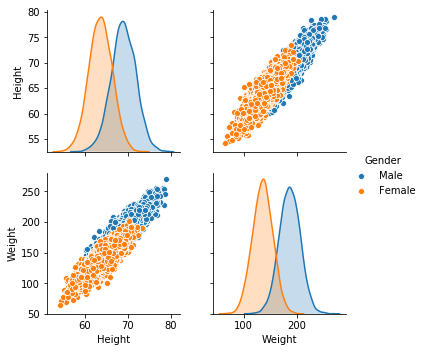

In [8]:
sns.pairplot(df,hue='Gender')

## Model

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

### Linear Regression

#### non-Gender-based

In [10]:
from sklearn.linear_model import LinearRegression
# Predict Weight from Height
lr = LinearRegression().fit(train['Height'].to_numpy().reshape(-1,1), train['Weight'])
lr.score(test['Height'].to_numpy().reshape(-1,1),test['Weight'])

0.8564962789644948

Text(0, 0.5, 'Weight')

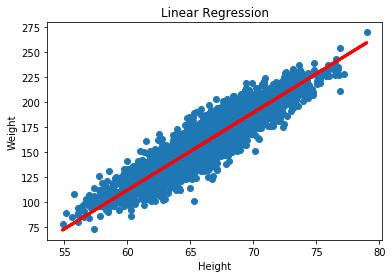

In [11]:
# Plot model
plt.scatter(test['Height'],test['Weight'])
plt.plot(test['Height'], lr.predict(test['Height'].to_numpy().reshape(-1,1)),
         color='red',linewidth=3)
plt.title('Linear Regression')
plt.xlabel('Height')
plt.ylabel('Weight')